<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project - Wine Recommender System <br> [Part 1 of 3]

## Contents:
- [Background](##Background)
- [Problem Statement](##Problem-Statement)
- [Data Dictionary](##Data-Dictionary)
- [Data Cleaning](##Data-Cleaning)
- [Exploratory Data Analysis](##Exploratory-Data-Analysis)

## Background

Wine is a complex and diverse product with a wide range of flavors, aromas, and characteristics. Consumers often struggle to find the perfect wine that suits their tastes and preferences. WineEnthusiast, a popular website and magazine that focuses on wine and spirits, has amassed a large collection of wine reviews and ratings, providing valuable insights into the quality and characteristics of various wines. Two datasets from Kaggle, which were scraped from WineEnthusiast in 2017 and 2020, contain information on different wines, including descriptions, points, prices, and taster names, among other variables.

These datasets offer an excellent opportunity to leverage machine learning and natural language processing (NLP) techniques to develop a wine recommender system. Such a system would help consumers find wines that match their preferences, and also aid wine retailers and distributors in effectively targeting their marketing efforts.

## Problem Statement

The primary goal of this capstone project is to design and implement a wine recommender system that takes into account various features of the wines, such as descriptions, points, prices, and taster names, to provide personalized recommendations to users based on their preferences.

The project will involve the following steps:

- Data cleaning and EDA: Clean and preprocess the datasets to remove duplicates, handle missing values, and identify relevant features for building the recommender system.

- Feature engineering: Extract and create additional features from the existing variables, such as text-based features from wine descriptions and categorical features from taster names.

- Model selection and development: Choose appropriate algorithms and techniques for building the recommender system, such as collaborative filtering, content-based filtering, or a hybrid approach.

- Model evaluation and validation: Assess the performance of the developed recommender system using appropriate evaluation metrics, such as precision, recall, and F1-score, and validate the model using cross-validation or holdout testing.

- Deployment and user interface: Design and implement a user-friendly interface for the wine recommender system, allowing users to input their preferences and receive personalized wine recommendations.

By the end of this project, I aim to deliver a robust and user-friendly wine recommender system that can effectively assist consumers in discovering new wines that match their preferences, and help wine retailers and distributors better target their marketing efforts.

---
## Data Dictionary
---

| Feature               | Description                                                                                               |
|-----------------------|-----------------------------------------------------------------------------------------------------------|
| country               | The country that the wine is from                                                                         |
| description           | The review given to the wine                                                                              |
| points                | The number of points/ratings WineEnthusiast rated the wine on a scale of 1-100                            |
| price                 | The cost for a bottle of the wine                                                                         |
| province              | The province or state that the wine is from                                                               |
| region_1              | The wine growing area in a province or state (i.e. Napa)                                                  |
| taster_name           | Name of Wine taster                                                                                       |
| title                 | Name, Year & Vineyard of the wine. This feature is the key feature to differentiate wines from each other |
| variety               | Type of wine (i.e. Pinot Noir)                                                                            |
| winery                | The place where the wine was made                                                                         |
| vintage               | The year the wine's grapes were harvested                                                                 |

In [52]:
# Importing Libraries

import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import warnings
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

plt.style.use('ggplot')

---
## Data Cleaning
---

### Import our training data

In [53]:
wine = pd.read_csv('../data/winemag-data-130k-v2.csv')
wine2 = pd.read_csv('../data/winemag-data-2017-2020.csv')

In [54]:
df = wine.merge(wine2, how='outer')

In [55]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,taster_photo,vintage
0,0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN
1,1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN
2,2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,NaN
3,3.0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,NaN
4,4.0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211086 entries, 0 to 211085
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  float64
 1   country                211018 non-null  object 
 2   description            211086 non-null  object 
 3   designation            152302 non-null  object 
 4   points                 211086 non-null  int64  
 5   price                  197443 non-null  float64
 6   province               211018 non-null  object 
 7   region_1               176926 non-null  object 
 8   region_2               81732 non-null   object 
 9   taster_name            184692 non-null  object 
 10  taster_twitter_handle  178797 non-null  object 
 11  title                  211086 non-null  object 
 12  variety                211085 non-null  object 
 13  winery                 211086 non-null  object 
 14  taster_photo           80965 non-nul

In [57]:
# Remove duplicates based on columns 'description', 'points', 'price', 'title'
df = df.drop_duplicates(subset=['description'])

In [58]:
df = df.drop(df.columns[[0, 3, 8, 10, 14]], axis=1)

#### Impute 'region_1' missing values

In [59]:
# Define a regular expression to match values within brackets
pattern = r'\((.*?)\)'

# Extract the values within brackets from the 'title' column
df['region_1'] = df['region_1'].fillna(df['title'].apply(lambda x: re.findall(pattern, x)[0] if len(re.findall(pattern, x)) > 0 else None))

#### Impute 'vintage' missing values

In [60]:
# replace null values in 'vintage' with 'NV' if 'title' contains 'NV'
df['vintage'] = df['vintage'].fillna(df['title'].apply(lambda x: 'NV' if 'NV' in x else None))

In [61]:
# Define a regular expression to match values of the form "19XX or 20XX"
pattern = r"(?:19|20)\d{2}"

# Extract the values that match the pattern from the 'title' column
df['vintage'] = df['vintage'].fillna(df['title'].apply(lambda x: re.findall(pattern, x)[0] if len(re.findall(pattern, x)) > 0 else None))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201045 entries, 0 to 211085
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      200981 non-null  object 
 1   description  201045 non-null  object 
 2   points       201045 non-null  int64  
 3   price        188014 non-null  float64
 4   province     200981 non-null  object 
 5   region_1     200457 non-null  object 
 6   taster_name  175983 non-null  object 
 7   title        201045 non-null  object 
 8   variety      201044 non-null  object 
 9   winery       201045 non-null  object 
 10  vintage      201045 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 18.4+ MB


#### Drop null values in 'country', 'province', 'region_1', 'variety'

In [63]:
df = df.dropna(subset=df.iloc[:, [0, 4, 5, 8]].columns)

#### Fill null values in 'taster_name' based on 'winery'

In [64]:
# Create a function to fill missing values based on the 'winery' column
def fillna_taster_name(group):
    group['taster_name'] = group['taster_name'].fillna(method='ffill').fillna(method='bfill')
    return group

# Group the DataFrame by 'winery' and apply the function
df = df.groupby('winery').apply(fillna_taster_name)

#### Fill null values in 'taster_name' based on 'region_1'

In [65]:
# Group the dataframe by 'region_1'
grouped_df = df.groupby('region_1')

# Fill null values in each group using ffill method
df['taster_name'] = grouped_df['taster_name'].fillna(method='ffill').fillna(method='bfill')

#### Drop null values in 'price'

In [66]:
df = df.dropna(subset=['price'])

In [67]:
df['price'] = df['price'].astype(int)

/var/folders/l3/fj37td4n0v5dx2z6bx4nz9cc0000gn/T/ipykernel_19750/2468783641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


#### Remove observations with variety < 100

In [68]:
# Calculate value counts for 'variety'
value_counts = df['variety'].value_counts()

# Filter dataframe to only include rows where value count is >= 100
df = df[df['variety'].isin(value_counts.index[value_counts >= 100])]

#### Remove observations with points < 90

In [69]:
df = df[df['points'] >= 90]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76172 entries, 142 to 211085
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      76172 non-null  object
 1   description  76172 non-null  object
 2   points       76172 non-null  int64 
 3   price        76172 non-null  int64 
 4   province     76172 non-null  object
 5   region_1     76172 non-null  object
 6   taster_name  76172 non-null  object
 7   title        76172 non-null  object
 8   variety      76172 non-null  object
 9   winery       76172 non-null  object
 10  vintage      76172 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.0+ MB


In [71]:
df.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery,vintage
142,France,Medium-gold in color. Complex and inviting nos...,92,80,Alsace,Alsace,Anne Krebiehl MW,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Riesling,Dopff & Irion,2004
143,Italy,"Slightly backward, particularly given the vint...",92,70,Piedmont,Barolo,Kerin O’Keefe,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto,2003
144,US,The vineyard is one of the better Chardonnay s...,92,36,California,Alexander Valley,Virginie Boone,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,Chardonnay,Matrix,2007
145,US,Defines Rockpile Zinfandel in intensity of fru...,92,39,California,Rockpile,Virginie Boone,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Zinfandel,Mauritson,2007
147,US,This sophisticated wine is mostly Cabernet Sau...,92,45,California,Napa Valley,Virginie Boone,Silverado 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Silverado,2006


In [72]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,76172,33,US,37323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,76172,76172,Medium-gold in color. Complex and inviting nos...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,76172.0,NaN,NaN,NaN,91.700533,1.632065,90.0,90.0,91.0,93.0,100.0
price,76172.0,NaN,NaN,NaN,53.901565,61.184934,6.0,28.0,42.0,60.0,3400.0
province,76172,293,California,26955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,76172,1175,Napa Valley,3209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,76172,19,Virginie Boone,13594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,76172,67325,Bailly-Lapierre NV Brut (Crémant de Bourgogne),7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,76172,110,Pinot Noir,12079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winery,76172,10476,Williams Selyem,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN


+ 19 wine `tasters` contributed to these wine reviews, with the highest no. of reviews coming from Roger Voss (32k reviews)
+ There are 110 wine `varieties` coming from 293 `provinces` in 33 `countries`
+ `Prices` range from $6 to $3400, with a median of $42
+ `Points` range from 90 to 100, with a median of 91 points

---
## Exploratory Data Analysis
---

#### Top 10 No. of Wine Reviews by Country

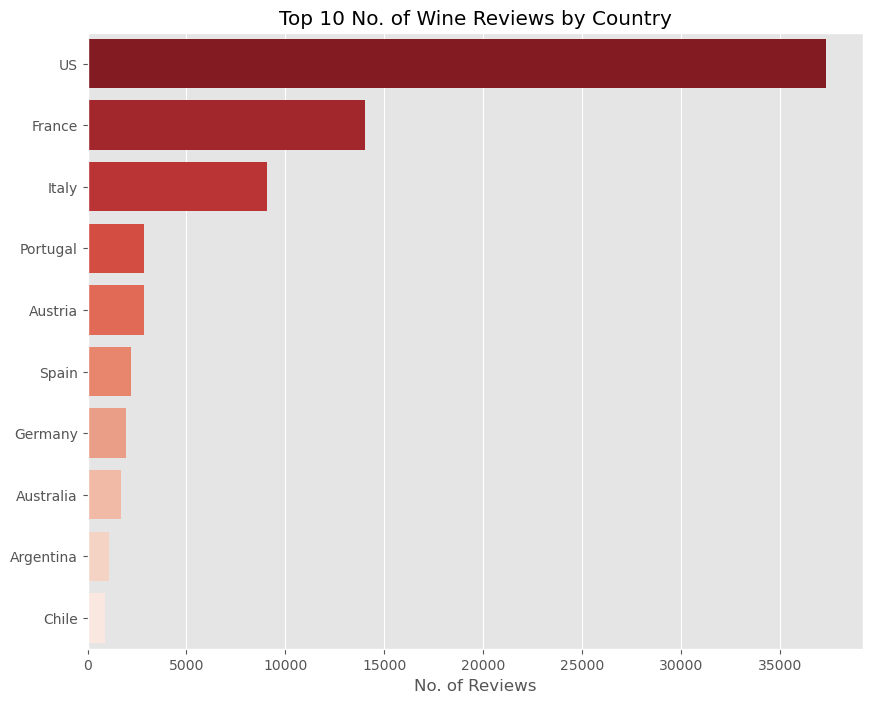

In [73]:
plt.figure(figsize=(10,8))
top_reviews = df['country'].value_counts().to_frame()[0:10]
sns.barplot(x= top_reviews['country'], y =top_reviews.index, data=top_reviews, palette='Reds_r',orient='h')
plt.title('Top 10 No. of Wine Reviews by Country')
plt.xlabel('No. of Reviews');

#### Distribution of Points / No. of Ratings by Taster Name

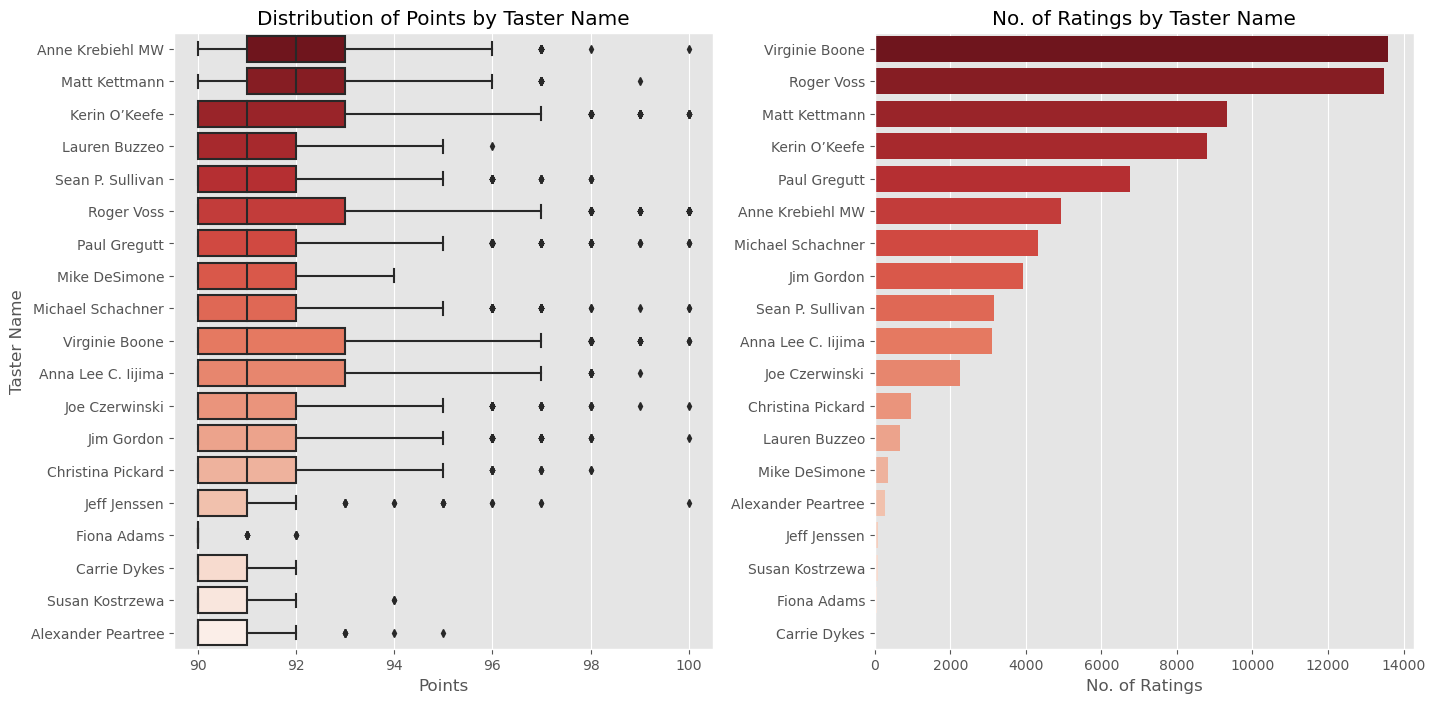

In [74]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Adjust the width of the padding between subplots
plt.subplots_adjust(wspace=0.3)

# Plot boxplot on the left subplot
order = df.groupby('taster_name')['points'].median().sort_values(ascending=False).index
sns.boxplot(y=df['taster_name'], x=df['points'], order=order, palette='Reds_r', fliersize=4, ax=axs[0])
axs[0].set_title('Distribution of Points by Taster Name')
axs[0].set_ylabel('Taster Name')
axs[0].set_xlabel('Points')
axs[0].set_xticks([90, 92, 94, 96, 98, 100])

# Plot barplot on the right subplot
counts = df['taster_name'].value_counts()
sns.barplot(y=counts.index, x=counts, palette='Reds_r', ax=axs[1])
axs[1].set_title('No. of Ratings by Taster Name')
axs[1].set_ylabel('')
axs[1].set_xlabel('No. of Ratings');

#### Average Price of Wine by Country

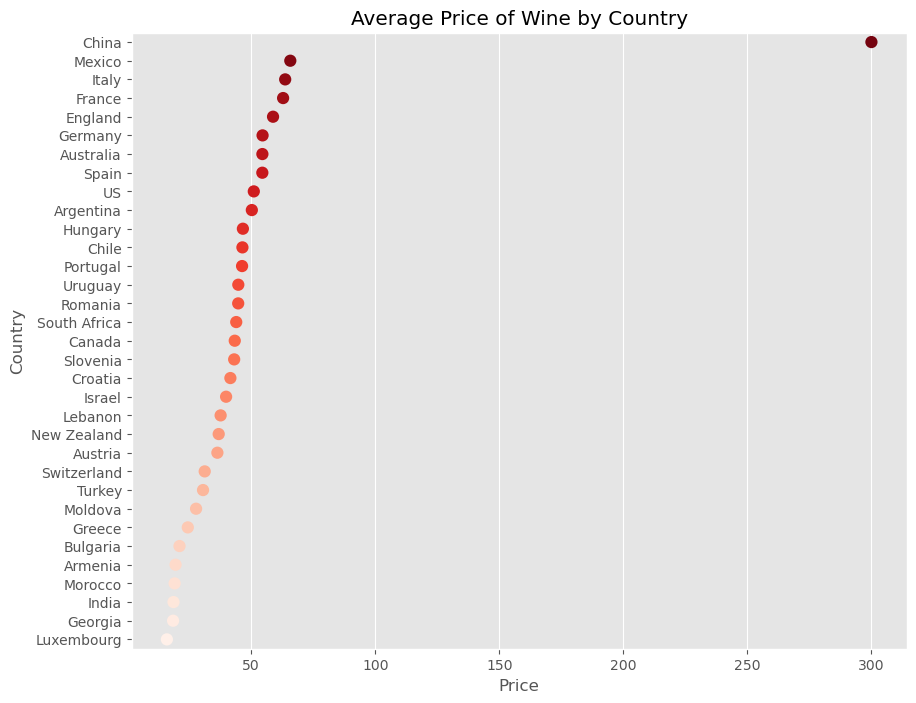

In [75]:
avg_price = df.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(10,8))
sns.pointplot(x = avg_price['price'] ,y = avg_price.index ,palette='Reds_r',orient='h',markers='o')
plt.title('Average Price of Wine by Country')
plt.xlabel('Price')
plt.ylabel('Country');

#### Most / Least Expensive Wines by Country

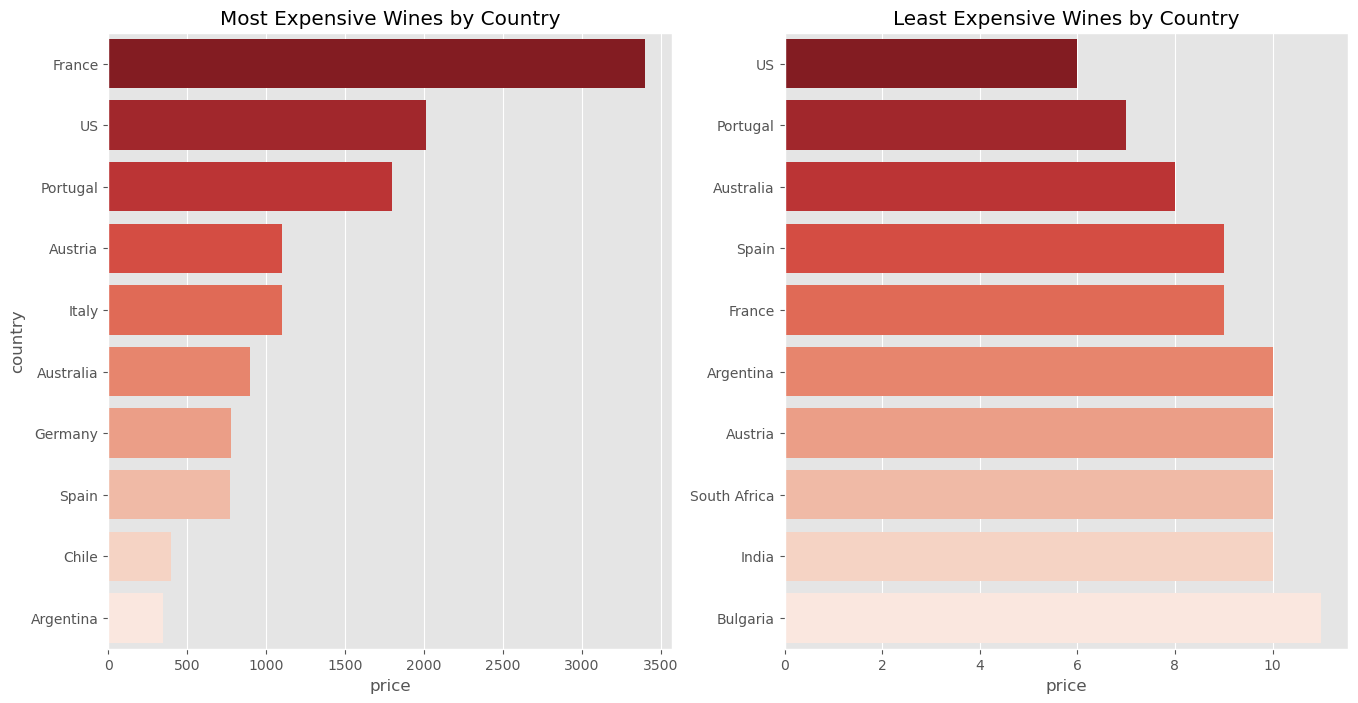

In [76]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

max_price = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x = max_price['price'], y = max_price.index, palette= 'Reds_r',ax=ax1)
ax1.set_title('Most Expensive Wines by Country')
min_price = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:10]
sns.barplot(x = min_price['price'], y = min_price.index, palette = 'Reds_r',ax=ax2)
ax2.set_title('Least Expensive Wines by Country')
ax2.set_ylabel('');

#### Distribution of Wine Prices by Country

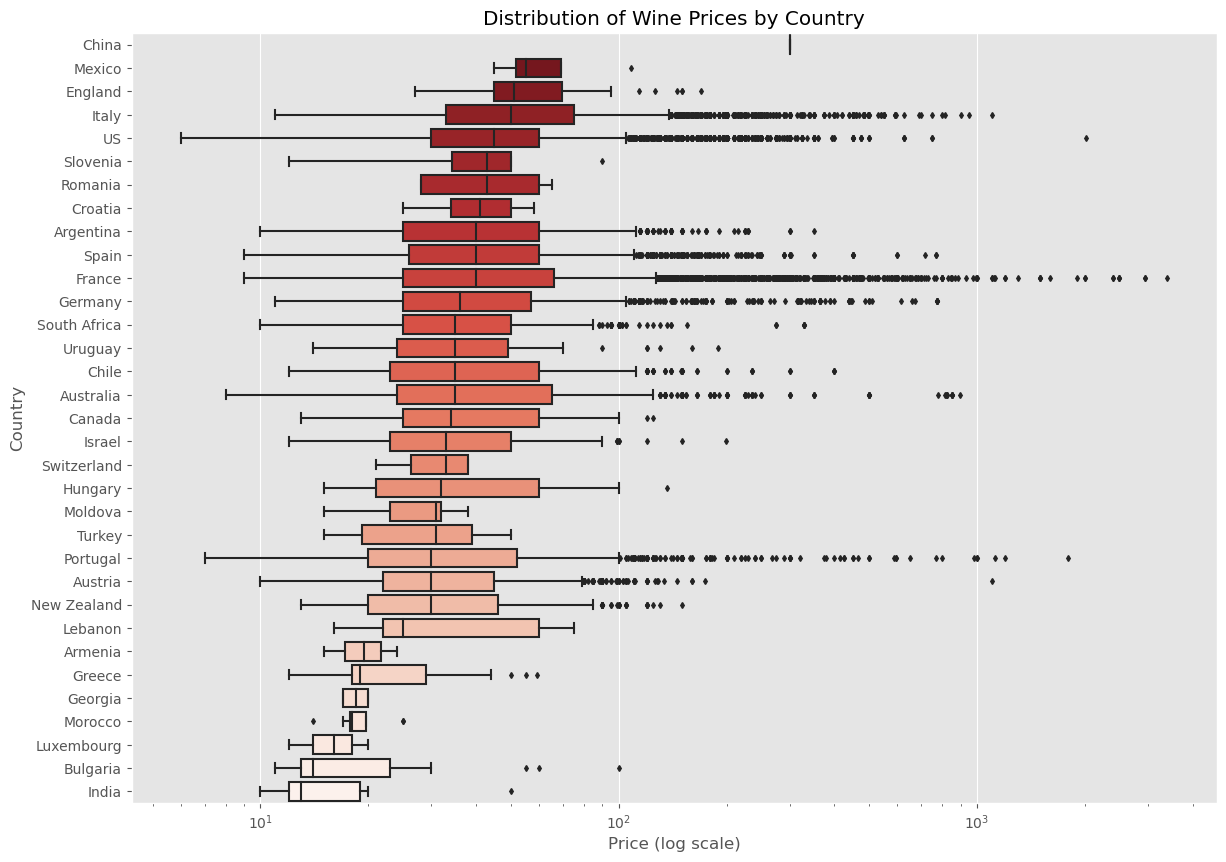

In [77]:
plt.figure(figsize=(14,10))
order = df.groupby('country')['price'].median().sort_values(ascending=False).index
sns.boxplot(y=df['country'], x=df['price'], order=order, palette='Reds_r', fliersize=3)
plt.xscale("log")
plt.title('Distribution of Wine Prices by Country')
plt.ylabel('Country')
plt.xlabel('Price (log scale)');

#### Distribution of Wine Ratings by Country

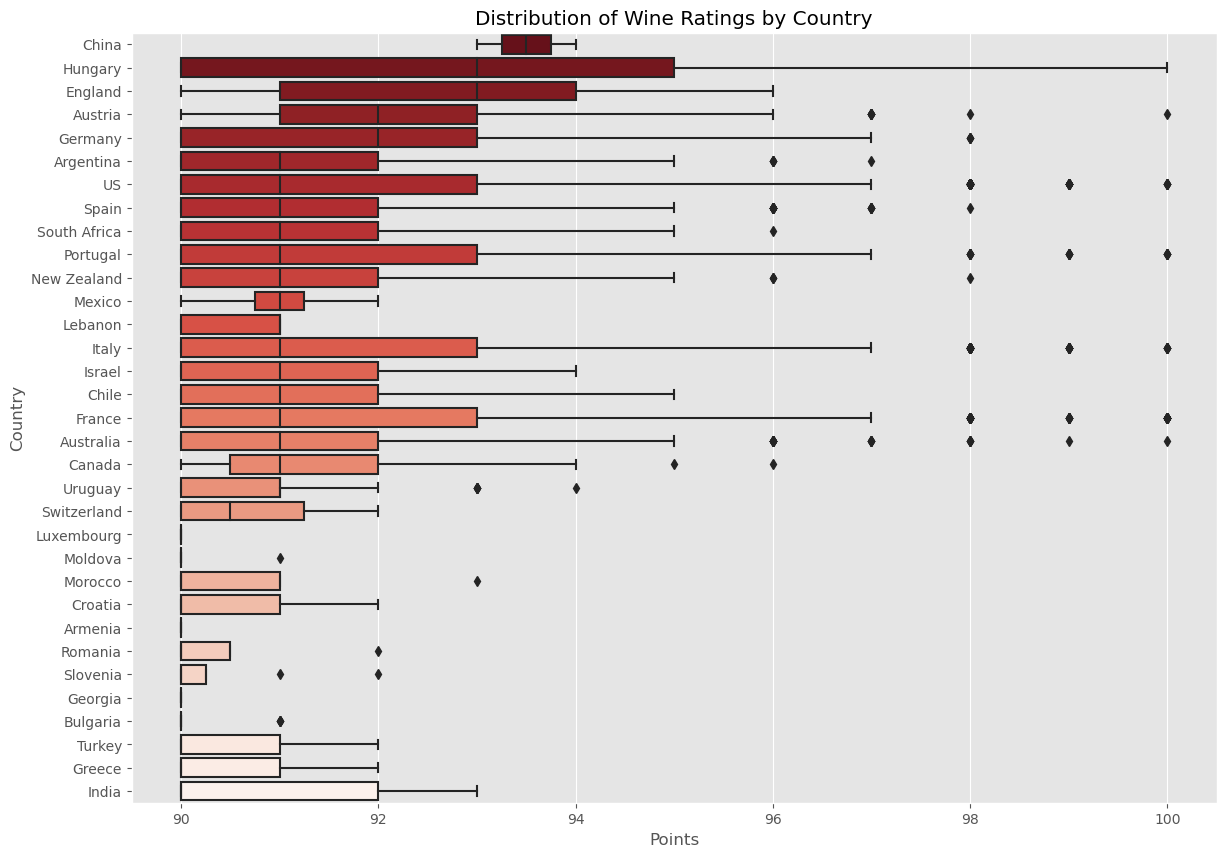

In [78]:
plt.figure(figsize=(14, 10))
order2 = df.groupby('country')['points'].median().sort_values(ascending=False).index
sns.boxplot(x=df['points'], y=df['country'], order = order2, palette='Reds_r', orient='h')
plt.xticks([90, 92, 94, 96, 98, 100])
plt.title('Distribution of Wine Ratings by Country')
plt.xlabel('Points')
plt.ylabel('Country')
plt.show()

#### Wine Prices vs. Ratings

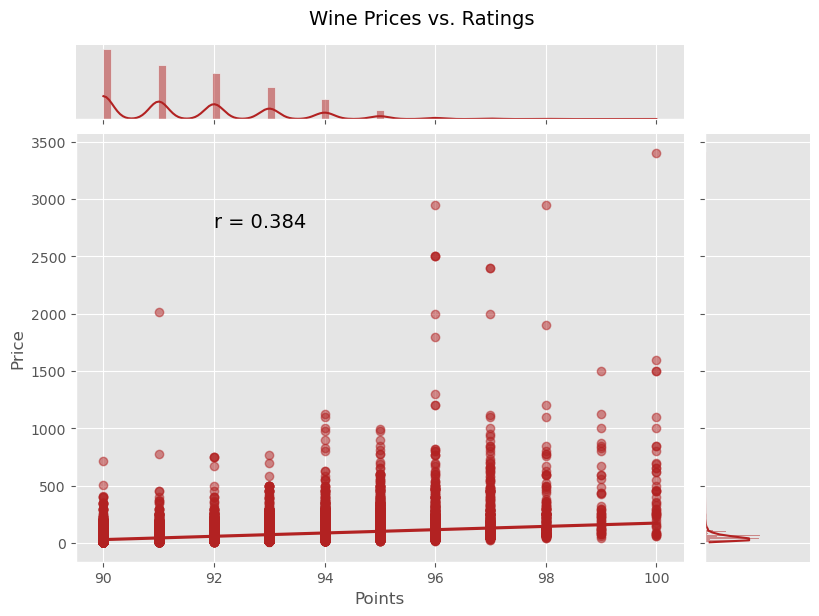

In [79]:
# Create the jointplot
g = sns.jointplot(data=df, x='points', y='price', kind='reg', height=10, scatter_kws={'alpha': 0.5}, color='firebrick')

# Calculate the Pearson correlation coefficient and p-value
corr, pval = pearsonr(df['price'], df['points'])

# Set the x-axis ticks
g.ax_joint.set_xticks([90, 92, 94, 96, 98, 100])

# Set the plot title and axis labels
g.set_axis_labels('Points', 'Price')
g.fig.suptitle('Wine Prices vs. Ratings', fontsize=14)

# Add the correlation coefficient to the plot
g.ax_joint.annotate("r = {:.3f}".format(corr), xy=(92, 2750), fontsize=14)

# Adjust the plot title position
g.fig.subplots_adjust(top=0.92)

# Set the size of the plot
g.fig.set_size_inches(8, 6)

# Display the plot
plt.show()

#### Top 10 Mean Wine Prices by Variety

Total Wine Varieties: 110


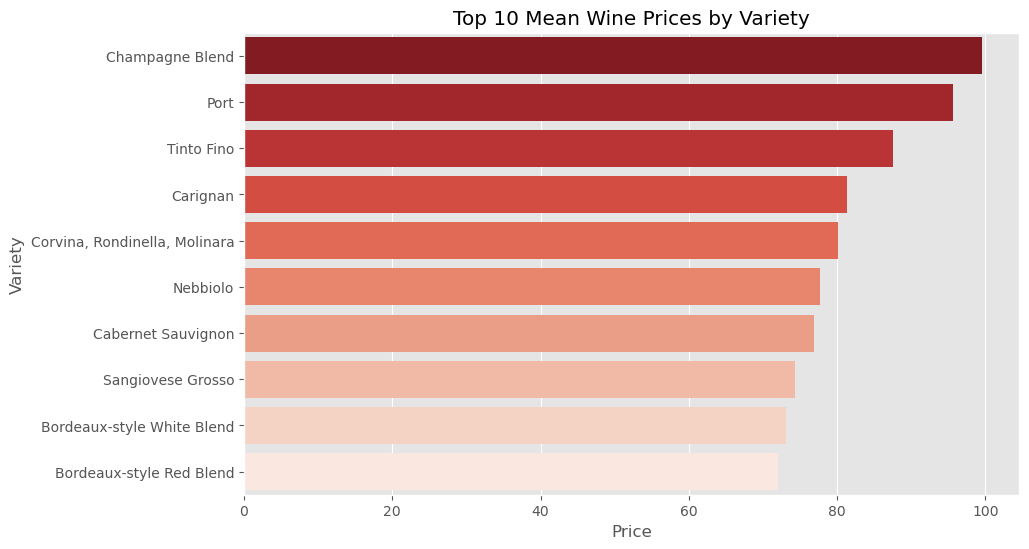

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))

mean_price_variety = df.groupby(['variety'])['price'].mean().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x=mean_price_variety['price'], y=mean_price_variety.index, palette='Reds_r', ax=ax)
ax.set_title('Top 10 Mean Wine Prices by Variety')
ax.set_ylabel('Variety')
ax.set_xlabel('Price')

print('Total Wine Varieties:',df['variety'].nunique())

plt.show();

#### Top 10 Most Expensive Wines by Province

Total Wine Provinces: 293


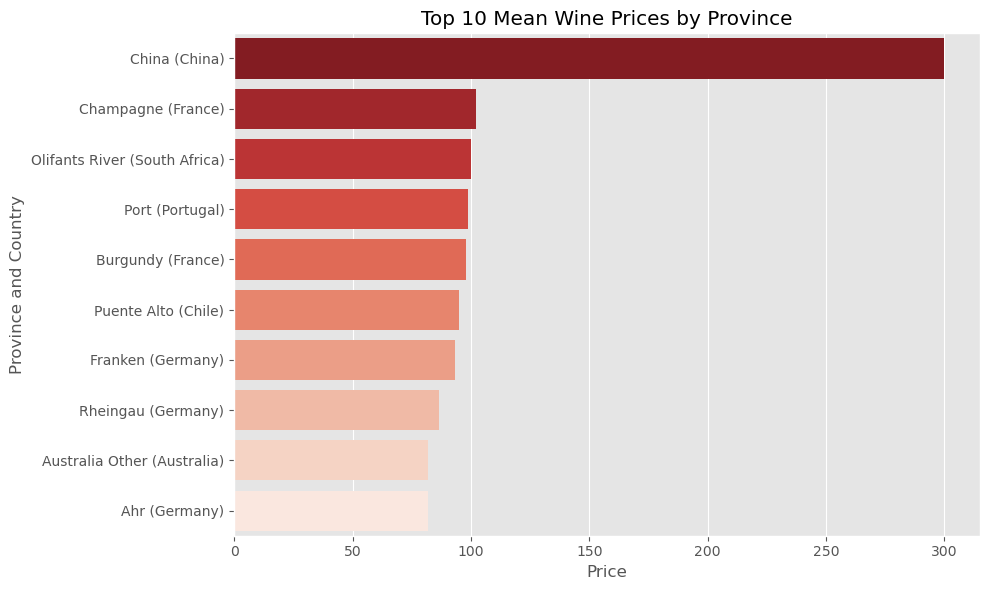

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))

mean_price_province = df.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:10]
mean_price_province['province_country'] = mean_price_province.apply(lambda x: f"{x.name} ({df[df['province']==x.name]['country'].unique()[0]})", axis=1)
sns.barplot(x=mean_price_province['price'], y=mean_price_province['province_country'], palette='Reds_r', ax=ax)
ax.set_title('Top 10 Mean Wine Prices by Province')
ax.set_ylabel('Province and Country')
ax.set_xlabel('Price')
plt.tight_layout()

print('Total Wine Provinces:',df['province'].nunique())

#### Price Info by Highest Points by Country

In [82]:
# Group the dataframe by 'country' and 'points' and calculate summary statistics
points_info = df.groupby(['country', 'points'])['price'].agg(['count', 'min', 'max', 'mean']).reset_index()

# Filter the dataframe to only include rows where 'points' is 98 and above
points_info = points_info[points_info['points'] >= 98]

# Sort the resulting dataframe by 'points' in descending order
points_info = points_info.sort_values(['points', 'count', 'mean'], ascending=False)

# Apply background gradient and formatting to the dataframe
points_info_styled = points_info.head(30).style.background_gradient(cmap='gist_heat', high=0.9).format({'min': '{:.0f}', 'max': '{:.0f}', 'mean': '{:.1f}'})

# Hide the index of the dataframe
points_info_styled = points_info_styled.hide(axis='index')

# Display the resulting dataframe with index
points_info_styled.set_caption('Price Info by Highest Points by Country')

country,points,count,min,max,mean
France,100,24,150,3400,765.2
Italy,100,8,79,689,346.0
Portugal,100,7,70,650,314.1
US,100,7,60,450,176.4
Australia,100,1,350,350,350.0
Hungary,100,1,136,136,136.0
Austria,100,1,65,65,65.0
US,99,16,44,300,160.5
Italy,99,15,125,595,281.9
France,99,9,114,1500,677.1


#### Word Cloud of Wine Description

In [83]:
# Add custom words to the list of stop words
stopwords = set(nltk_stopwords.words('english'))
stopwords_to_add = ['wine', 'flavor', 'palate', 'aroma', 'finish', 'drink', 'offers', 'now', 'give', 'alongside', 'well', 'ready', 'show', 'shows', 'flavors', 
                    'acidity', 'note', 'nose', 'vineyard', 'hint', 'year', 'structure', 'structured', 'touch', 'texture', 'blend', 'made', 'come', 'crushed',
                    'plus', 'much', 'like', 'still', 'long', 'age', 'bottling', 'fine', 'freshness', 'delicious', 'open', 'time', 'richness', 'character',
                    'yet', 'great', 'new', 'also', 'one', 'make', 'along', 'delivers', 'need', 'showing', 'wild', 'best', 'glass', 'generous']

for word in stopwords_to_add:
    stopwords.add(word)

(-0.5, 399.5, 199.5, -0.5)

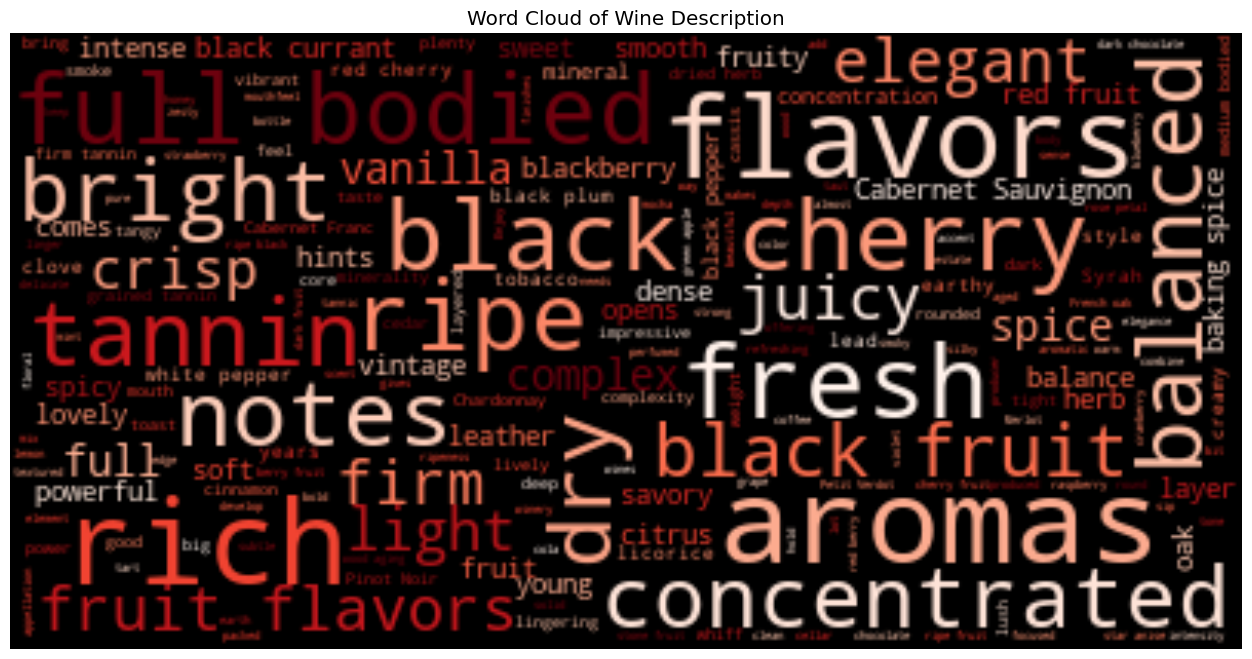

In [84]:
plt.figure(figsize= (16,8))
plt.title('Word Cloud of Wine Description')
wc = WordCloud(max_words=1000, max_font_size=40, background_color='black', stopwords = stopwords, colormap='Reds_r')
wc.generate(' '.join(df['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

In [85]:
# Instantiate Count Vectorizers & TF-IDF Vectorizers
count_vectorizer_uni = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1))
count_vectorizer_bi = CountVectorizer(stop_words=stopwords, ngram_range=(2, 2))
count_vectorizer_tri = CountVectorizer(stop_words=stopwords, ngram_range=(3, 3))

tfidf_vectorizer_uni = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 1))
tfidf_vectorizer_bi = TfidfVectorizer(stop_words=stopwords, ngram_range=(2, 2))
tfidf_vectorizer_tri = TfidfVectorizer(stop_words=stopwords, ngram_range=(3, 3))


In [86]:
def plot_top_ngrams(ax, vectorizer, descriptions, ngram_type, vectorizer_type, n=20):
    # Fit the vectorizer and transform the descriptions
    X = vectorizer.fit_transform(descriptions)

    # Sum the word or n-gram frequencies and sort them
    word_freq = np.array(np.sum(X, axis=0))[0]
    sorted_word_freq = np.argsort(word_freq)[::-1]

    # Get the top n words or n-grams and their frequencies
    top_n_indices = sorted_word_freq[:n]
    top_n_words = pd.Series([vectorizer.get_feature_names_out()[i] for i in top_n_indices])[::-1] # Reverse the order
    top_n_freq = pd.Series([int(word_freq[i]) for i in top_n_indices])[::-1] # Reverse the order

    # Create a count plot
    sns.barplot(x=top_n_freq, y=top_n_words, palette='Reds', ax=ax)
    ax.set_title(f'Top {n} {ngram_type} ({vectorizer_type} Vectorizer)')
    ax.set_xlabel('Frequency')

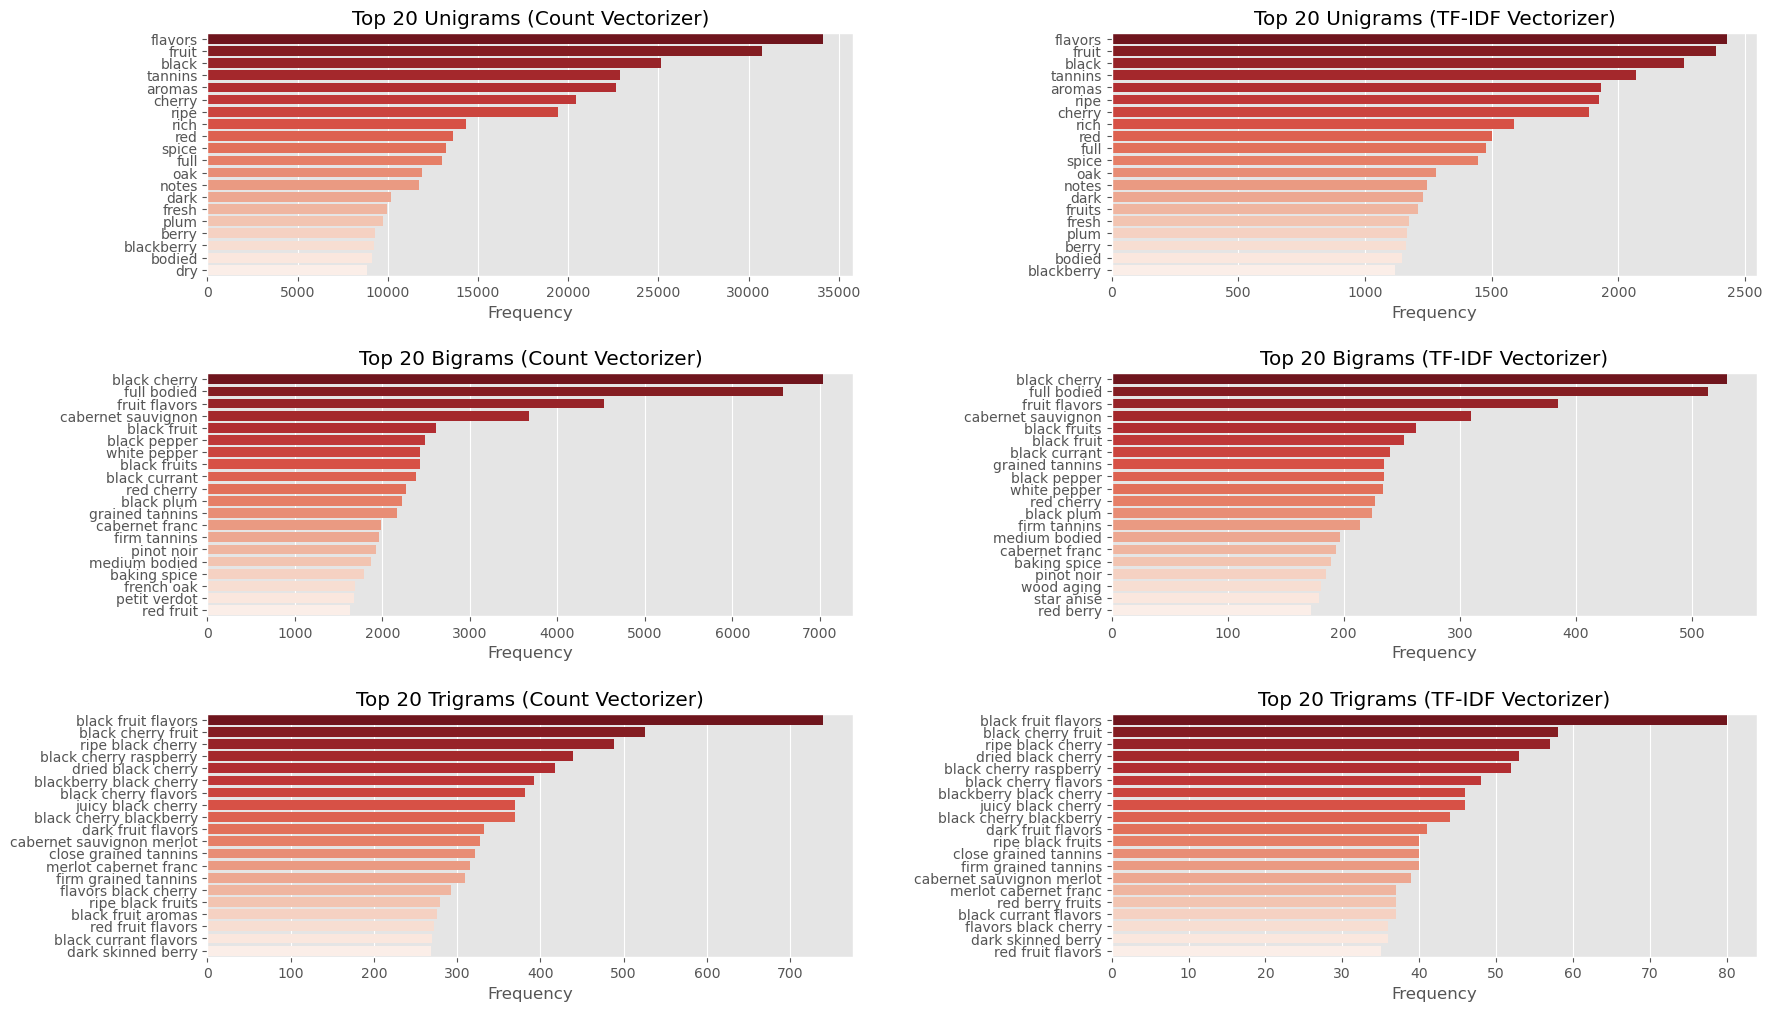

In [87]:
# Get the wine descriptions
descriptions = df['description']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot the top 20 unigrams, bigrams, and trigrams for the Count Vectorizer
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    plot_top_ngrams(axs[0, 0], count_vectorizer_uni, descriptions, 'Unigrams', 'Count', n=20)
    plot_top_ngrams(axs[1, 0], count_vectorizer_bi, descriptions, 'Bigrams', 'Count', n=20)
    plot_top_ngrams(axs[2, 0], count_vectorizer_tri, descriptions, 'Trigrams', 'Count', n=20)

# Plot the top 20 unigrams, bigrams, and trigrams for the TF-IDF Vectorizer
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    plot_top_ngrams(axs[0, 1], tfidf_vectorizer_uni, descriptions, 'Unigrams', 'TF-IDF', n=20)
    plot_top_ngrams(axs[1, 1], tfidf_vectorizer_bi, descriptions, 'Bigrams', 'TF-IDF', n=20)
    plot_top_ngrams(axs[2, 1], tfidf_vectorizer_tri, descriptions, 'Trigrams', 'TF-IDF', n=20)

# Set the y-axis limits to be the same for all subplots
for ax in axs.flat:
    ax.set_ylim(-0.5, 19.5)

# Display the plots
plt.show()

## Preprocessing

In [88]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation.replace('-', '')))  # Exclude '-' from the punctuation list
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if re.match('^[a-zA-Z0-9-]+$', token)]
    
    return tokens

In [89]:
# Create a list of tokenized descriptions
df['tokens'] = df['description'].apply(preprocess_text)

In [90]:
# Convert tokens column to set of unique tokens
unique_tokens = df['tokens'].apply(set)

# Explode unique tokens column to create new row for each token
exploded_tokens = unique_tokens.explode()

# Count number of unique tokens
num_unique_tokens = exploded_tokens.nunique()

print(f"Number of unique tokens: {num_unique_tokens}")

Number of unique tokens: 29293


In [91]:
top_tokens = df['tokens'].explode().value_counts()[:300]
print(top_tokens)

with pd.option_context('display.max_rows', None):
    print(top_tokens)

fruit        36421
flavor       34032
tannin       24886
aroma        22615
black        20857
             ...  
winemaker     1229
richly        1222
high          1218
little        1207
highlight     1207
Name: tokens, Length: 300, dtype: int64
fruit            36421
flavor           34032
tannin           24886
aroma            22615
black            20857
cherry           20732
ripe             19210
spice            15069
rich             14231
red              11796
note             11690
oak              11366
blackberry       10268
berry             9816
plum              9646
fresh             9616
dark              9103
herb              8157
dry               8042
white             7972
apple             7869
juicy             7753
firm              7557
full              7396
pepper            7334
lemon             7313
cabernet          7228
raspberry         7132
concentrated      6947
bright            6786
balanced          6688
dried             6434
vanilla        

In [92]:
unique_tokens = df['tokens'].explode().value_counts()
print(unique_tokens.head(100))

fruit        36421
flavor       34032
tannin       24886
aroma        22615
black        20857
             ...  
stone         2888
cinnamon      2880
violet        2860
there         2834
cranberry     2824
Name: tokens, Length: 100, dtype: int64


In [93]:
df.to_csv('../data/wine_reviews_clean.csv', index=False)